In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(f"So you said you were researching ocean mammals?", name="Bot")]
messages.append(HumanMessage(f"Yes, I know about whales. But what others should I learn about?", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?


In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke(messages)

AIMessage(content='In addition to whales, there are several fascinating ocean mammals worth learning about:\n\n1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are part of the same family as whales. The bottlenose dolphin is the most recognizable species.\n\n2. **Porpoises**: Similar to dolphins but generally smaller and stouter, porpoises are another interesting group of marine mammals.\n\n3. **Seals**: Seals are pinnipeds and come in various species, including harbor seals and elephant seals. They are known for their ability to live both in water and on land.\n\n4. **Sea Lions**: Often confused with seals, sea lions are distinguished by their external ear flaps and greater mobility on land.\n\n5. **Walruses**: Known for their large tusks and whiskers, walruses inhabit the Arctic regions.\n\n6. **Manatees**: Also known as sea cows, these gentle giants are herbivores found in shallow coastal areas and rivers of the Caribbean, Gulf of Mexico, Amazon Basin, an

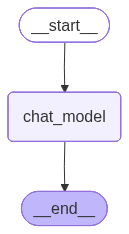

In [4]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals that are worth learning about:

1. **Dolphins**: These intelligent and social creatures are part of the cetacean family, along with whales and porpoises. They are known for their playful behavior and advanced communication skills.

2. **Porpoises**: Similar to dolphins but generally smaller with different shaped teeth and dorsal fins. They tend to be less acrobatic than dolphins.

3. **Seals**: These pinnipeds are found in various oceans around the world. They are excellent swimmers and divers, but they also spend time on land or ice floes.

4. **

## Remove

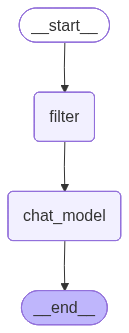

In [7]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Lance", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Aside from whales, there are several other ocean mammals you might find interesting to study:

1. **Dolphins** - Known for their intelligence and playful behavior, dolphins are highly social creatures found in both salt and freshwater environments. There are several species, including the well-known bottlenose dolphin.

2. **Porpoises** - Similar to dolphins but generally smaller and with different tooth shapes, porpoises are less flamboyant but equally fascinating.

3. **Seals** - These pinnipeds are known for their characteristic flippers and blubber. Seals often inhabit colder climates and are known for their 

## Filter

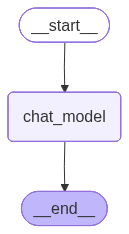

In [34]:
# Node
def chat_model_node(state: MessagesState):
    print(f"Hihhihi \n {state["messages"]}")
    print(len(state["messages"]))
    print(state["messages"][-1:])
    print(len(state["messages"][-1:]))
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Narwhals!", name="Lance"))

In [36]:
messages

[AIMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Bot', id='1'),
 HumanMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Lance', id='2'),
 AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Bot', id='3'),
 HumanMessage(content='Yes, I know about whales. But what others should I learn about?', additional_kwargs={}, response_metadata={}, name='Lance', id='4'),
 AIMessage(content='Aside from whales, there are several other ocean mammals you might find interesting to study:\n\n1. **Dolphins** - Known for their intelligence and playful behavior, dolphins are highly social creatures found in both salt and freshwater environments. There are several species, including the well-known bottlenose dolphin.\n\n2. **Porpoises** - Similar to dolphins but generally smaller and with different tooth shapes, porpoises are less flamboyant but equally fascinating.\n\n3. **Seals** - These pin

In [37]:
#  Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

Hihhihi 
 [AIMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Bot', id='1'), HumanMessage(content='Hi.', additional_kwargs={}, response_metadata={}, name='Lance', id='2'), AIMessage(content='So you said you were researching ocean mammals?', additional_kwargs={}, response_metadata={}, name='Bot', id='3'), HumanMessage(content='Yes, I know about whales. But what others should I learn about?', additional_kwargs={}, response_metadata={}, name='Lance', id='4'), AIMessage(content='Aside from whales, there are several other ocean mammals you might find interesting to study:\n\n1. **Dolphins** - Known for their intelligence and playful behavior, dolphins are highly social creatures found in both salt and freshwater environments. There are several species, including the well-known bottlenose dolphin.\n\n2. **Porpoises** - Similar to dolphins but generally smaller and with different tooth shapes, porpoises are less flamboyant but equally fascinating.\n\n3. **Seals** - The

## Trim

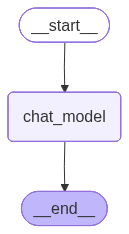

In [38]:
from langchain_core.messages import trim_messages

# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=ChatOpenAI(model="gpt-4.1"),
            allow_partial=False,
        )
    return {"messages": [llm.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Lance"))

In [ ]:
# # Example of trimming messages
# trim_messages(
#             messages,
#             max_tokens=100,
#             strategy="last",
#             token_counter=ChatOpenAI(model="gpt-4o"),
#             allow_partial=False
#         )

In [40]:
# Invoke, using message trimming in the chat_model_node 
messages_out_trim = graph.invoke({'messages': messages})